In [ ]:
import pandas as pd
phishing_df = pd.read_csv('2.online-valid.csv', usecols=['url']).head(8000)
phishing_urls = phishing_df[['url']].copy()
print(phishing_urls.head())


                                                 url
0  http://u1047531.cp.regruhosting.ru/acces-inges...
1  http://hoysalacreations.com/wp-content/plugins...
2  http://www.accsystemprblemhelp.site/checkpoint...
3  http://www.accsystemprblemhelp.site/login_atte...
4  https://firebasestorage.googleapis.com/v0/b/so...


In [ ]:
phishing_urls.shape

(8000, 1)

In [ ]:
phishing_urls.head()


,url
0,http://u1047531.cp.regruhosting.ru/acces-inges...
1,http://hoysalacreations.com/wp-content/plugins...
2,http://www.accsystemprblemhelp.site/checkpoint...
3,http://www.accsystemprblemhelp.site/login_atte...
4,https://firebasestorage.googleapis.com/v0/b/so...


In [ ]:
import pandas as pd

benign_urls = pd.read_csv('1.Benign_list_big_finalnew.csv', header=None, names=['url']).head(8000)
benign_urls = benign_urls.copy()
print(benign_urls.head())


                         url
0     https://www.google.com
1    https://www.youtube.com
2   https://www.facebook.com
3  https://www.wikipedia.org
4     https://www.amazon.com


In [ ]:
benign_urls.shape

(8000, 1)

In [ ]:
import re
from urllib.parse import urlparse
import numpy as np
from collections import Counter

def url_length(url):
    return 1 if len(url) >= 54 else 0

def url_depth(url):
    return 1 if urlparse(url).path.count('/') >= 4 else 0

def has_https(url):
    return 0 if urlparse(url).scheme == 'https' else 1

def num_dots(url):
    return 1 if url.count('.') >= 3 else 0

def has_ip(url):
    return 1 if re.search(r'(\d{1,3}\.){3}\d{1,3}', url) else 0

def is_shortened(url):
    shortening_services = ['bit.ly', 'goo.gl', 'tinyurl.com', 'is.gd', 't.co']
    return 1 if any(service in url for service in shortening_services) else 0

def has_at_symbol(url):
    return 1 if '@' in url else 0

def has_redirection(url):
    return 1 if url.count('//') > 1 else 0

def has_hyphen(url):
    return 1 if '-' in urlparse(url).netloc else 0

def subdomain_count(url):
    return 1 if urlparse(url).netloc.count('.') > 2 else 0

def tld_infrequent(url):
    infrequent_tlds = ['.tk', '.ml', '.ga', '.cf', '.gq']
    return 1 if any(url.endswith(tld) for tld in infrequent_tlds) else 0

def calculate_entropy(url):
    p, lns = Counter(url), float(len(url))
    entropy = -sum(count/lns * np.log2(count/lns) for count in p.values())
    return 1 if entropy > 4 else 0

def has_suspicious_words(url):
    suspicious_words = ['secure', 'account', 'webscr', 'login', 'ebayisapi', 'banking', 'confirm', 'verify']
    return 1 if any(word in url.lower() for word in suspicious_words) else 0

def digit_to_char_ratio(url):
    digits = sum(c.isdigit() for c in url)
    return 1 if digits / len(url) >= 0.3 else 0

def special_char_count(url):
    special_chars = re.findall(r'[?=&%]', url)
    return 1 if len(special_chars) > 3 else 0

def num_query_params(url):
    return 1 if urlparse(url).query.count('&') >= 1 else 0

def has_hexadecimal(url):
    return 1 if re.search(r'%[0-9a-fA-F]{2}', url) else 0

def uppercase_to_lowercase_ratio(url):
    uppercase = sum(1 for c in url if c.isupper())
    lowercase = sum(1 for c in url if c.islower())
    return 1 if uppercase / lowercase > 1 else 0

def has_suspicious_file_extension(url):
    suspicious_extensions = ['.exe', '.bat', '.js', '.php', '.zip']
    return 1 if any(url.endswith(ext) for ext in suspicious_extensions) else 0

def has_port_number(url):
    return 1 if urlparse(url).port else 0

def path_length(url):
    return 1 if len(urlparse(url).path) >= 10 else 0

def extract_features(url):
    features = [
        url_length(url),
        url_depth(url),
        has_https(url),
        num_dots(url),
        has_ip(url),
        is_shortened(url),
        has_at_symbol(url),
        has_redirection(url),
        has_hyphen(url),
        subdomain_count(url),
        tld_infrequent(url),
        calculate_entropy(url),
        has_suspicious_words(url),
        digit_to_char_ratio(url),
        special_char_count(url),
        num_query_params(url),
        has_hexadecimal(url),
        uppercase_to_lowercase_ratio(url),
        has_suspicious_file_extension(url),
        has_port_number(url),
        path_length(url),
    ]
    return features


In [ ]:

url = "https://www.yahoo.com"
features = extract_features(url)
print(features)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
phish_features = []
for i in range(min(8000, len(phishing_urls))):
    url = phishing_urls['url'].iloc[i]
    features = extract_features(url)
    label = 1
    features.append(label)

    phish_features.append(features)
phishing_features_df = pd.DataFrame(phish_features)


In [ ]:
legit_features = []
for i in range(min(8000, len(benign_urls))):
    url = benign_urls['url'].iloc[i]
    features = extract_features(url)


    num_zeroes = features.count(0)
    label = 0 if num_zeroes > 10 else 1
    features.append(label)

    legit_features.append(features)

legitimate_features_df = pd.DataFrame(legit_features)

In [ ]:
final_df = pd.concat([phishing_features_df, legitimate_features_df], ignore_index=True)

# Define column names for features plus the label
feature_names = [
    'url_length', 'url_depth', 'has_https', 'num_dots', 'has_ip', 'is_shortened',
    'has_at_symbol', 'has_redirection', 'has_hyphen', 'subdomain_count',
    'tld_infrequent', 'entropy', 'suspicious_words', 'digit_to_char_ratio',
    'special_char_count', 'num_query_params', 'has_hexadecimal', 'uppercase_to_lowercase_ratio',
    'has_suspicious_file_extension', 'has_port_number', 'path_length', 'label'
]

# Assign column names to final DataFrame
final_df.columns = feature_names

# Save the final DataFrame to a CSV file
final_df.to_csv('final_combine1.csv', index=False)
print("Feature extraction, labeling, and saving completed.")

Feature extraction, labeling, and saving completed.


In [ ]:
final_df.shape


(16000, 22)

In [ ]:
print(final_df['label'].value_counts())


label
1    8000
0    8000
Name: count, dtype: int64


In [ ]:
import pandas as pd
data = pd.read_csv('final_combine1.csv')

In [ ]:
print(data.head())          # First 5 rows
print(data.info())          # Data types and non-null counts
print(data.describe())      # Summary statistics

   url_length  url_depth  has_https  num_dots  has_ip  is_shortened  \
0           1          0          1         1       0             0   
1           1          1          1         0       0             0   
2           0          0          1         1       0             0   
3           1          0          1         1       0             0   
4           1          1          0         1       0             1   

   has_at_symbol  has_redirection  has_hyphen  subdomain_count  ...  \
0              0                0           0                1  ...   
1              0                0           0                0  ...   
2              0                0           0                0  ...   
3              0                0           0                0  ...   
4              0                0           0                0  ...   

   suspicious_words  digit_to_char_ratio  special_char_count  \
0                 0                    0                   0   
1                 

In [ ]:
print(data.isnull().sum())  # Check for missing values

url_length                       0
url_depth                        0
has_https                        0
num_dots                         0
has_ip                           0
is_shortened                     0
has_at_symbol                    0
has_redirection                  0
has_hyphen                       0
subdomain_count                  0
tld_infrequent                   0
entropy                          0
suspicious_words                 0
digit_to_char_ratio              0
special_char_count               0
num_query_params                 0
has_hexadecimal                  0
uppercase_to_lowercase_ratio     0
has_suspicious_file_extension    0
has_port_number                  0
path_length                      0
label                            0
dtype: int64


In [ ]:
X = data.drop(columns=['label'])
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('final_combine1.csv')

X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)* 100)
print(classification_report(y_test, y_pred_rf))

cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest Cross-Validation Accuracy:", cross_val_scores.mean()*100)


Random Forest Results:
Accuracy: 93.65625
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1596
           1       0.95      0.92      0.94      1604

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200


Random Forest Cross-Validation Accuracy: 92.85624999999999


In [ ]:
import joblib
joblib.dump(rf_model, 'phishing_final_model.pkl')


['phishing_final_model.pkl']

In [ ]:
import joblib
import numpy as np

rf_model = joblib.load('phishing_final_model.pkl')

def extract_features_from_user_input(url):
    features = [
        url_length(url),
        url_depth(url),
        has_https(url),
        num_dots(url),
        has_ip(url),
        is_shortened(url),
        has_at_symbol(url),
        has_redirection(url),
        has_hyphen(url),
        subdomain_count(url),
        tld_infrequent(url),
        calculate_entropy(url),
        has_suspicious_words(url),
        digit_to_char_ratio(url),
        special_char_count(url),
        num_query_params(url),
        has_hexadecimal(url),
        uppercase_to_lowercase_ratio(url),
        has_suspicious_file_extension(url),
        has_port_number(url),
        path_length(url)
    ]
    return np.array(features).reshape(1, -1)


user_url = input("Please enter a URL to check: ")

user_features = extract_features_from_user_input(user_url)

prediction = rf_model.predict(user_features)

if prediction[0] == 1:
    print("The URL is phishing.")
else:
    print("The URL is legitimate.")


Please enter a URL to check: https://google-apps.cz/
The URL is phishing.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#WITH PCA AND MODEL

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('final_combine1.csv')
print('Original DataFrame shape:', data.shape)

X = data.drop('label', axis=1)
y = data['label']
print('Inputs DataFrame shape:', X.shape)


Original DataFrame shape: (16000, 22)
Inputs DataFrame shape: (16000, 21)


In [ ]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std


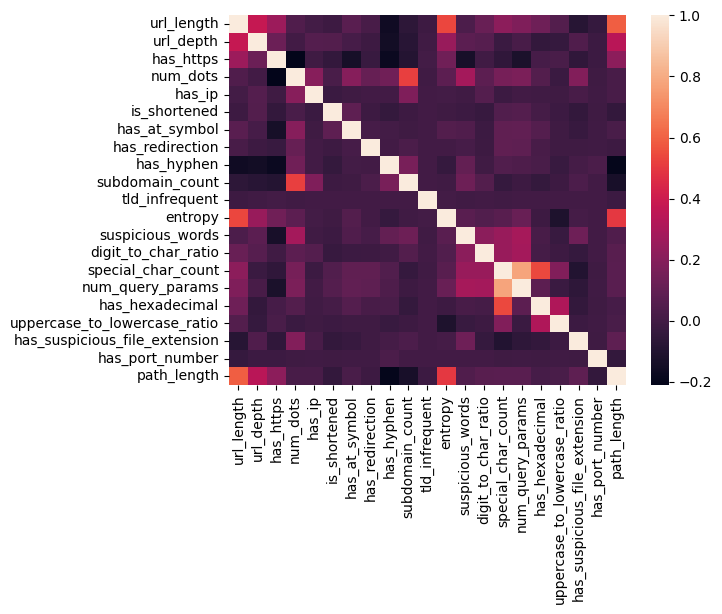

In [ ]:
c = Z.cov()
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [2.70981765 2.3496274  1.77978864 0.08648088 1.30176627 0.35020128
 0.37238472 0.45155044 1.18371231 0.62719311 0.65275535 0.7181911
 0.72983706 1.09615156 0.80666244 0.84252393 0.90653544 1.03973864
 0.98188419 1.01302582 1.00017177]
Eigen values Shape: (21,)
Eigen Vector Shape: (21, 21)


In [ ]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]


In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.12903894, 0.24092595, 0.32567779, 0.38766667, 0.44403392,
       0.49623161, 0.54574298, 0.5939823 , 0.64160953, 0.68836592,
       0.73153427, 0.77165446, 0.81006696, 0.8448211 , 0.87902068,
       0.91010427, 0.9399706 , 0.96147301, 0.97920561, 0.99588186,
       1.        ])

In [ ]:
n_components = np.argmax(explained_var >= 0.80) + 1
n_components


13

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)
total_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total explained variance with 13 components: {total_variance:.2%}")


Total explained variance with 13 components: 95.40%


In [ ]:
loadings = pca.components_
pca_loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(13)])
print("Feature Contributions to Each Principal Component:")
print(pca_loadings_df)


Feature Contributions to Each Principal Component:
      url_length  url_depth  has_https  num_dots    has_ip  is_shortened  \
PC1     0.552865   0.560988   0.312032 -0.012915  0.003310      0.000304   
PC2     0.110509   0.006346  -0.486036  0.502506  0.017175      0.029111   
PC3    -0.205999   0.650499  -0.447453  0.146923  0.018530      0.037805   
PC4     0.109946  -0.321748   0.287599  0.608149  0.038108     -0.091566   
PC5    -0.329826   0.345656   0.603064  0.225911  0.021194      0.028140   
PC6    -0.142819  -0.105405   0.023298 -0.337444 -0.036302     -0.279009   
PC7     0.109655   0.117556   0.048476 -0.128736 -0.006856     -0.143049   
PC8    -0.011089  -0.070404   0.068893 -0.062815 -0.019892      0.843366   
PC9    -0.338014   0.016566   0.055824  0.006402 -0.017751      0.308255   
PC10   -0.386308   0.059629   0.064385  0.074416  0.024879     -0.214171   
PC11   -0.229160   0.061445   0.005910 -0.022005 -0.007746     -0.151684   
PC12    0.408774  -0.032733   0.00019

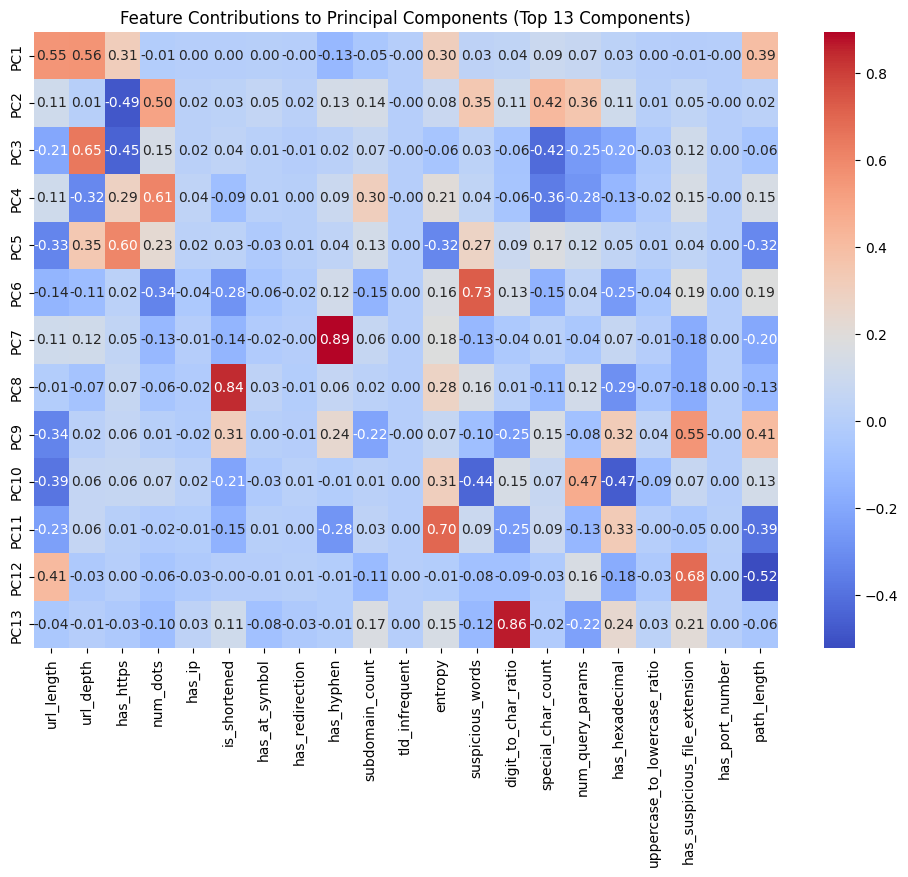

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Contributions to Principal Components (Top 13 Components)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.66%


In [ ]:
import joblib

joblib.dump(pca, 'pca_model1.pkl')
joblib.dump(model, 'classifier_model1.pkl')

print("PCA and classifier models saved successfully!")


PCA and classifier models saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))


Training Accuracy: 93.98%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1596
           1       0.95      0.92      0.94      1604

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200


Confusion Matrix (Test Data):
[[1514   82]
 [ 121 1483]]


In [ ]:
import joblib

joblib.dump(pca, 'pca_model.pkl')
joblib.dump(model, 'classifier_model.pkl')

print("PCA and classifier models saved successfully!")


PCA and classifier models saved successfully!


In [ ]:
pca_loaded = joblib.load('pca_model.pkl')
model_loaded = joblib.load('classifier_model.pkl')

def predict_url(new_data):
    new_data = np.array(new_data).reshape(1, -1)

    new_data_pca = pca_loaded.transform(new_data)

    prediction = model_loaded.predict(new_data_pca)

    return "Phishing" if prediction == 1 else "Legitimate"

import numpy as np

n=input("Enter the url")
new_url_data =extract_features(n)
prediction_label = predict_url(new_url_data)
print("Predicted class:", prediction_label)

Enter the urlhttps://google-apps.cz/
Predicted class: Phishing


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
